In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# Nettoyage

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df = df.rename(columns={"sex": "genre"})
df = df.rename(columns={"bmi":"IMC"})
df = df.rename(columns={"children":"enfants"})
df = df.rename(columns={"smoker":"fumeur"})

In [7]:
df.columns

Index(['age', 'genre', 'IMC', 'enfants', 'fumeur', 'region', 'charges'], dtype='object')

In [8]:
label_encoder = preprocessing.LabelEncoder() 

In [9]:
df["genre"]=label_encoder.fit_transform(df["genre"])
df["genre"].unique()
#0 = femme ; 1 = homme

array([0, 1])

In [10]:
df["fumeur"]=label_encoder.fit_transform(df["fumeur"])
df["fumeur"].unique()
#0 = non-fumeur ; 1 = fumeur

array([1, 0])

In [11]:
df.head()

,age,genre,IMC,enfants,fumeur,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [12]:
df.query("genre== 1").shape[0]

676

In [13]:
df.dtypes

age          int64
genre        int64
IMC        float64
enfants      int64
fumeur       int64
region      object
charges    float64
dtype: object

In [14]:
df.head()

,age,genre,IMC,enfants,fumeur,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [15]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [16]:
encoder = OneHotEncoder(sparse_output=False)

In [17]:
one_hot = encoder.fit_transform(df[['region']])

In [18]:
regions_encoded = pd.DataFrame(one_hot, columns=encoder.get_feature_names_out(['region']))
df = pd.concat([df, regions_encoded], axis=1)

In [19]:
df = df.drop(columns=['region'])

In [20]:
df.duplicated().any()

np.True_

In [21]:
df.isna().any()

age                 False
genre               False
IMC                 False
enfants             False
fumeur              False
charges             False
region_northeast    False
region_northwest    False
region_southeast    False
region_southwest    False
dtype: bool

In [22]:
doublons = df[df.duplicated()]
print(doublons)

     age  genre    IMC  enfants  fumeur    charges  region_northeast  \
581   19      1  30.59        0       0  1639.5631               0.0   

     region_northwest  region_southeast  region_southwest  
581               1.0               0.0               0.0  


In [23]:
df[df['charges'] == 1639.5631]

,age,genre,IMC,enfants,fumeur,charges,region_northeast,region_northwest,region_southeast,region_southwest
195,19,1,30.59,0,0,1639.5631,0.0,1.0,0.0,0.0
581,19,1,30.59,0,0,1639.5631,0.0,1.0,0.0,0.0


In [24]:
df = df.drop(index=581, axis=0)

In [25]:
df.to_csv("dataset_cleaned.csv", index=False)

# Visualisation

[Text(0, 0, 'Nord-Est'),
 Text(1, 0, 'Nord-Ouest'),
 Text(2, 0, 'Sud-Est'),
 Text(3, 0, 'Sud-Ouest')]

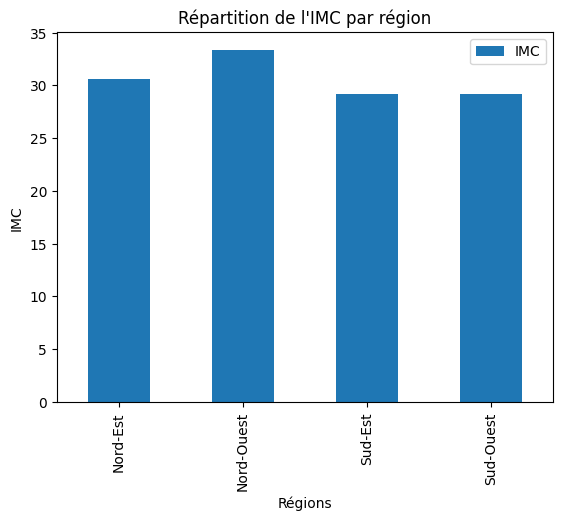

<Figure size 1200x800 with 0 Axes>

In [26]:
imc_region = df[['region_northeast', 'region_northwest', 'region_southeast','region_southwest']].join(df["IMC"]).groupby(['region_northeast', 'region_northwest', 'region_southeast','region_southwest']).mean()
fig = imc_region.plot(kind="bar")
x_labels = ["Nord-Est","Nord-Ouest","Sud-Est","Sud-Ouest"]

plt.figure(figsize=(12, 8))
fig.set_title("Répartition de l'IMC par région")
fig.set_xlabel('Régions')
fig.set_ylabel('IMC')
fig.set_xticklabels(x_labels)

[Text(0.5, 1.0, "Répartition des charges par l'âge")]

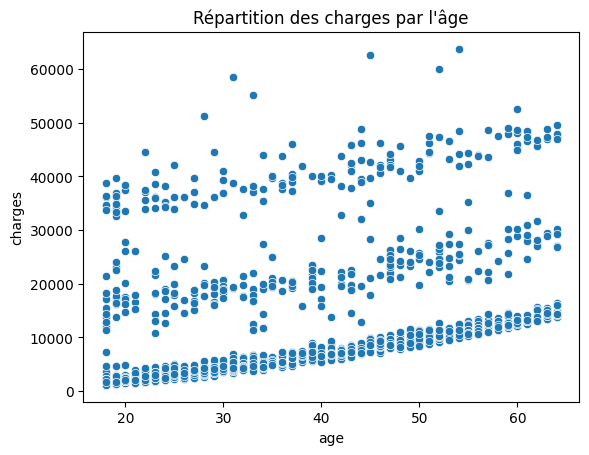

In [27]:
sns.scatterplot(data = df, y = "charges", x = "age").set(title="Répartition des charges par l'âge")

<function matplotlib.pyplot.show(close=None, block=None)>

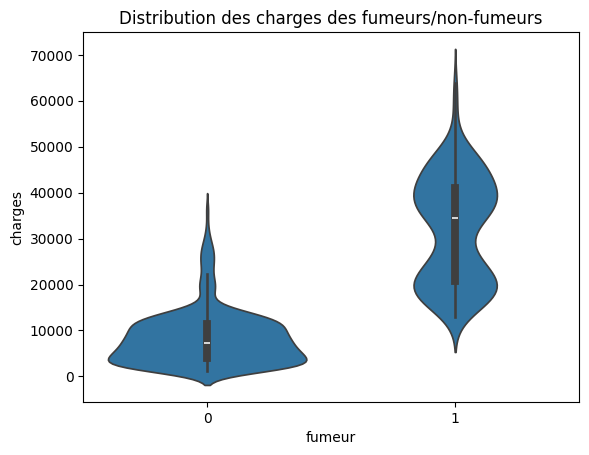

In [28]:
sns.violinplot(x=df["fumeur"], y =df["charges"]).set(title="Distribution des charges des fumeurs/non-fumeurs")
plt.show

[Text(0.5, 1.0, 'Distribution des charges des fumeurs du Nord-Est')]

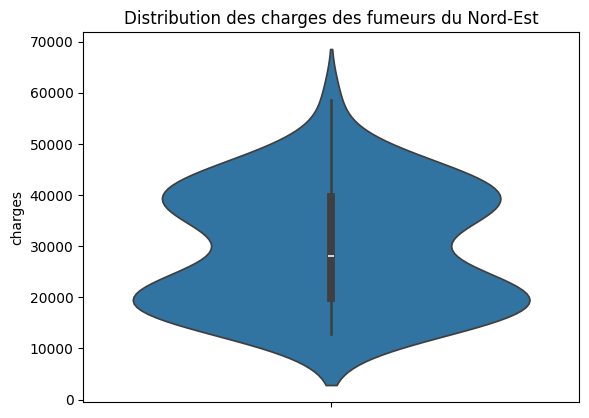

In [29]:
charge_fumeur_northeast = df[(df["region_northeast"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
sns.violinplot(y = charge_fumeur_northeast["charges"]).set(title="Distribution des charges des fumeurs du Nord-Est")


[Text(0.5, 1.0, 'Distribution des charges des fumeurs du Nord-Ouest')]

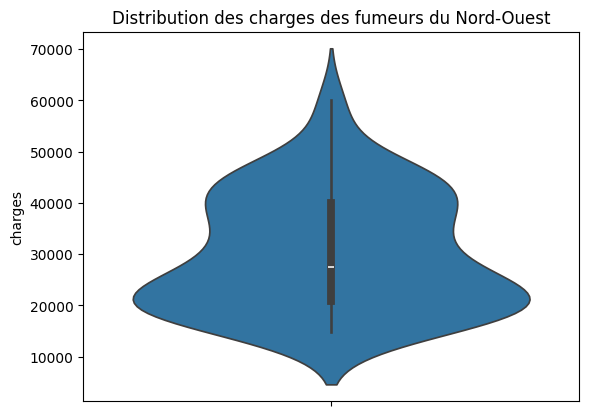

In [30]:
charge_fumeur_region_northwest = df[(df["region_northwest"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
sns.violinplot(y = charge_fumeur_region_northwest["charges"]).set(title="Distribution des charges des fumeurs du Nord-Ouest")

[Text(0.5, 1.0, 'Distribution des charges des fumeurs du Sud-Est')]

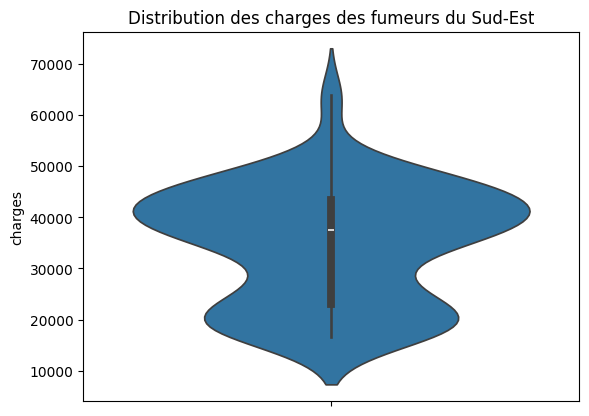

In [31]:
charge_fumeur_region_southeast = df[(df["region_southeast"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
sns.violinplot(y = charge_fumeur_region_southeast["charges"]).set(title="Distribution des charges des fumeurs du Sud-Est")

[Text(0.5, 1.0, 'Distribution des charges des fumeurs du Sud-Ouest')]

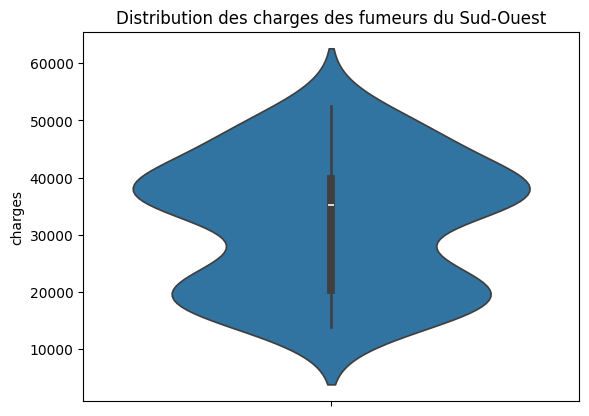

In [32]:
charge_fumeur_region_southwest = df[(df["region_southwest"] == 1.0) & (df["fumeur"] == 1)] [["charges"]]
sns.violinplot(y = charge_fumeur_region_southwest["charges"]).set(title="Distribution des charges des fumeurs du Sud-Ouest")


In [33]:
charge_homme_northeast = df[(df["region_northeast"] == 1.0) & (df["genre"] == 1)]["charges"].mean()
charge_homme_southeast = df[(df["region_southeast"] == 1.0) & (df["genre"] == 1)]["charges"].mean()
charge_homme_northwest = df[(df["region_northwest"] == 1.0) & (df["genre"] == 1)]["charges"].mean()
charge_homme_southwest = df[(df["region_southwest"] == 1.0) & (df["genre"] == 1)]["charges"].mean()

In [34]:
charge_femme_northeast = df[(df["region_northeast"] == 1.0) & (df["genre"] == 0)]["charges"].mean()
charge_femme_southeast = df[(df["region_southeast"] == 1.0) & (df["genre"] == 0)]["charges"].mean()
charge_femme_northwest = df[(df["region_northwest"] == 1.0) & (df["genre"] == 0)]["charges"].mean()
charge_femme_southwest = df[(df["region_southwest"] == 1.0) & (df["genre"] == 0)]["charges"].mean()

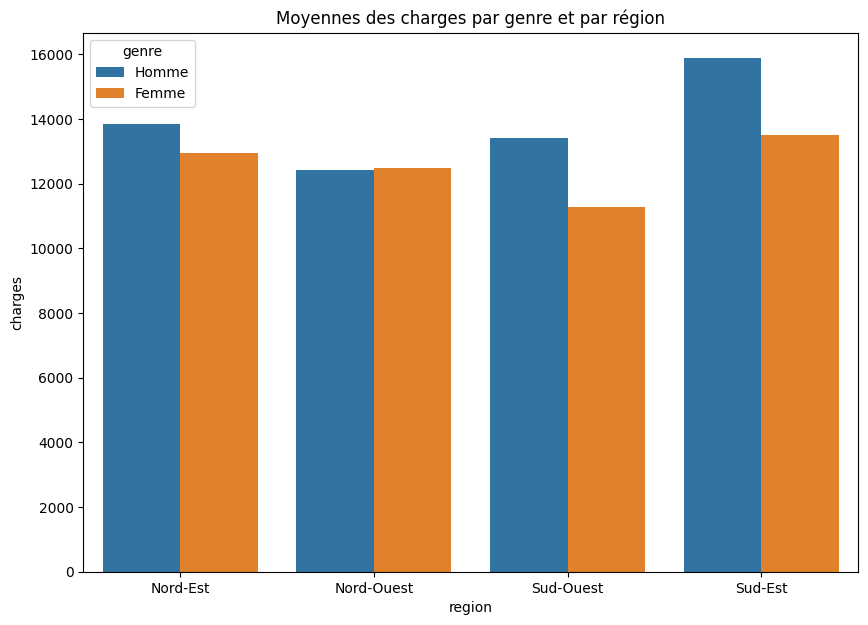

In [35]:
df_charges = {
    "region": ["Nord-Est","Nord-Ouest","Sud-Ouest","Sud-Est"] * 2,
    "charges": [
        charge_homme_northeast,charge_homme_northwest, charge_homme_southwest, charge_homme_southeast,
        charge_femme_northeast, charge_femme_northwest, charge_femme_southwest, charge_femme_southeast
    ],
    "genre": ["Homme"] * 4 + ["Femme"] * 4
}

plt.figure(figsize=(10, 7))
sns.barplot(x="region", y="charges", hue="genre", data=df_charges)


plt.title("Moyennes des charges par genre et par région")
plt.show()


In [36]:
charge_fumeur = df[(df["fumeur"] == 1)]["charges"]
charge_nonfumeur = df[(df["fumeur"] == 0)]["charges"]

fumeuroui = df[(df["fumeur"] == 1)]
fumeurnon = df[(df["fumeur"] == 0)]

df_charges2 = pd.DataFrame({
    "IMC": df["IMC"],  
    "charges": pd.concat([charge_fumeur, charge_nonfumeur], axis=0),
    "fumeur": df["fumeur"].replace({1: "Fumeur", 0: "Non fumeur"}) 
})

[Text(0.5, 1.0, "Répartition des charges par l'IMC")]

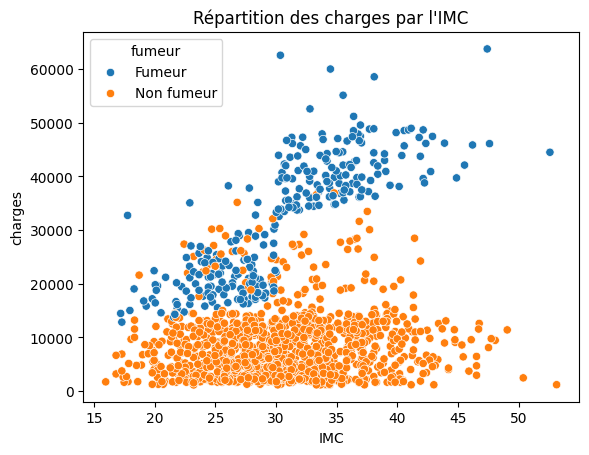

In [37]:
sns.scatterplot(data=df_charges2, x="IMC", y="charges", hue="fumeur").set(title="Répartition des charges par l'IMC")

In [38]:
charge_northeast = df[(df["region_northeast"] == 1.0)]["charges"].mean()
charge_northwest = df[(df["region_northwest"] == 1.0)]["charges"].mean()
charge_southeast = df[(df["region_southeast"] == 1.0)]["charges"].mean()
charge_southwest = df[(df["region_southwest"] == 1.0)]["charges"].mean()

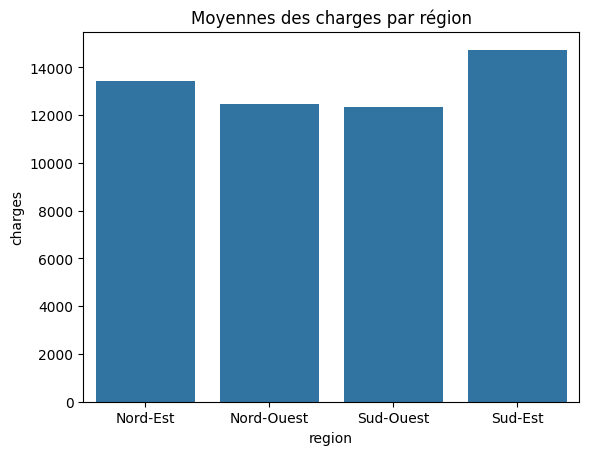

In [39]:
df_charges = {
    "region": ["Nord-Est","Nord-Ouest","Sud-Ouest","Sud-Est"],
    "charges": [
        charge_northeast, charge_northwest, charge_southwest,charge_southeast
    ]
}

sns.barplot(x="region", y="charges", data=df_charges)

plt.title("Moyennes des charges par région")
plt.show()

In [40]:
charge_northeast1 = df[(df["region_northeast"] == 1.0) & (df["fumeur"] == 1.0) ]["charges"].mean()
charge_northwest2 = df[(df["region_northwest"] == 1.0) & (df["fumeur"] == 1.0) ]["charges"].mean()
charge_southeast3 = df[(df["region_southeast"] == 1.0) & (df["fumeur"] == 1.0) ]["charges"].mean()
charge_southwest4 = df[(df["region_southwest"] == 1.0)& (df["fumeur"] == 1.0) ]["charges"].mean()

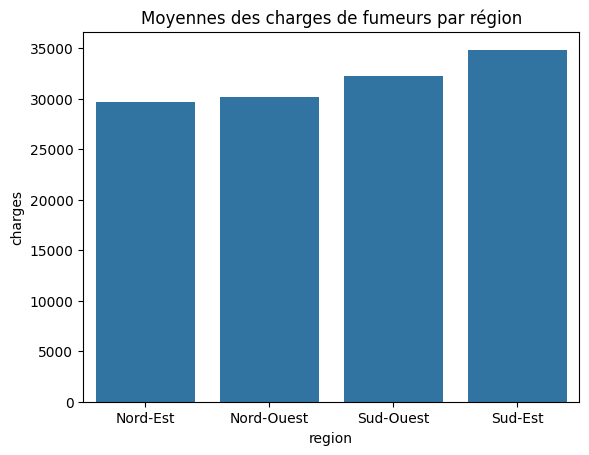

In [41]:
df_charges_fumeur = {
    "region": ["Nord-Est","Nord-Ouest","Sud-Ouest","Sud-Est"],
    "charges": [
        charge_northeast1, charge_northwest2, charge_southwest4, charge_southeast3,
    ]
}

sns.barplot(x="region", y="charges", data=df_charges_fumeur)

plt.title("Moyennes des charges de fumeurs par région")
plt.show()



[Text(0.5, 1.0, "Distribution de l'IMC des fumeurs/non-fumeurs")]

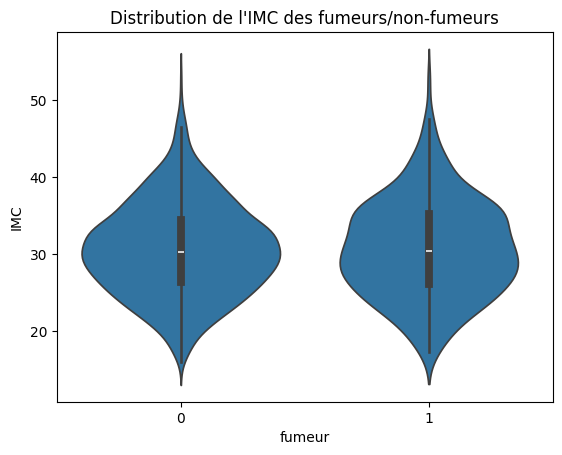

In [42]:
sns.violinplot(x=df["fumeur"], y = df["IMC"]).set(title="Distribution de l'IMC des fumeurs/non-fumeurs")

[Text(0.5, 1.0, 'Distribution des charges par genre')]

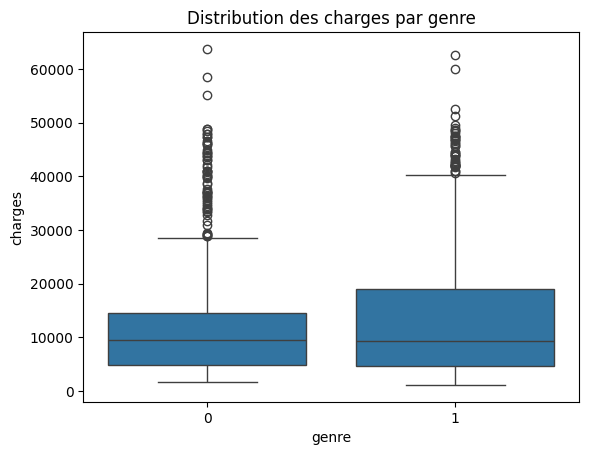

In [43]:
sns.boxplot(x="genre", y="charges", data = df).set(title="Distribution des charges par genre")

[Text(0.5, 1.0, "Distribution de l'âge des fumeurs/non-fumeurs")]

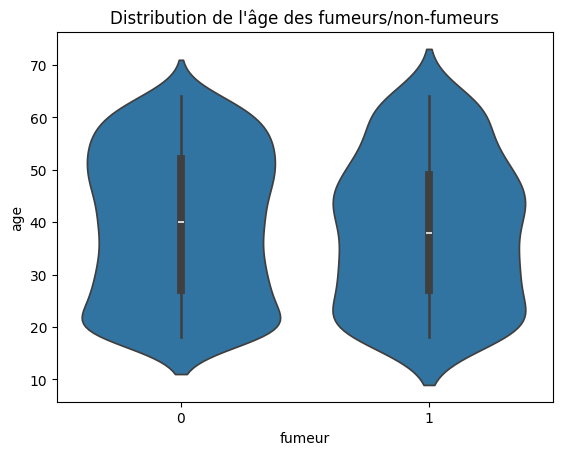

In [44]:
sns.violinplot(x=df["fumeur"], y = df["age"]).set(title="Distribution de l'âge des fumeurs/non-fumeurs")

[Text(0.5, 1.0, 'Fumeur et age par rapport aux charges')]

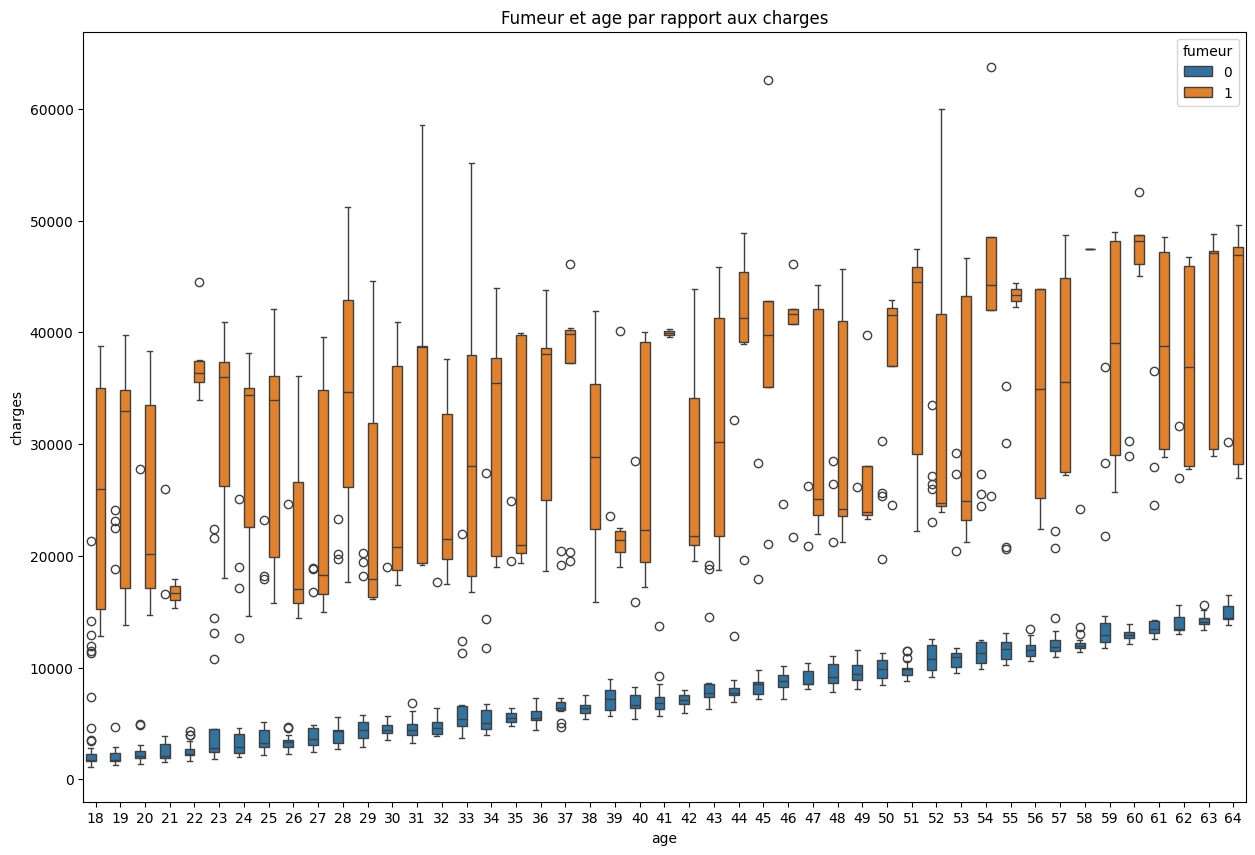

In [45]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="age", y="charges", hue="fumeur").set(title="Fumeur et age par rapport aux charges")

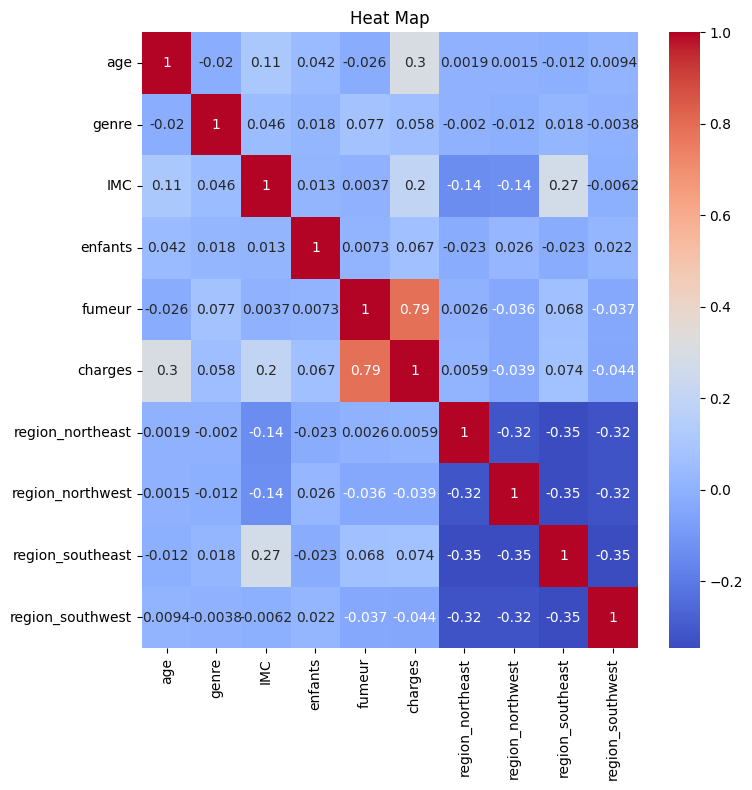

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm").set(title="Heat Map")
plt.show()